# Aulas 02 - Matplotlib

O matplotlib é uma biblioteca que permite graficar diversos tipos de representações diretamente a partir de arrays. Possui essencialmente todos os tipos de gráficos que estudamos na aula passada, mas com uma sintaxe diferente a do pandas, o que afetará não somente como plotamos as visualizações, mas, também, elementos "estéticos" associados a elas (como legendas, eixos e afins). 

A biblioteca do matplotlib define alguns **elementos básicos** a partir dos quais se estruturam todas as suas funções.

### Elementos básicos de uma figura com matplotlib

[Guia oficial do matplotlib](https://matplotlib.org/stable/tutorials/introductory/quick_start.html)

Na figura abaixo, temos definidos os **elementos básicos** mencionados acima. Eles servirão como parâmetros nas mais variadas funções da biblioteca.

<img src="https://matplotlib.org/stable/_images/anatomy.png" alt="drawing" width="600"/>

É essencial que entendamos três outros elementos fundamentais para a melhor utilização da biblioteca matplotlib:

**-Figure:** é a imagem como um todo; a "figura" prorpiamente dita.

**-Axes:** contém todos os elementos do plot em si, incluindo os eixos, mas não apenas eles.

**-Axis:** são os eixos do gráfico (eixo-x; eixo-y; eixo-z).

## Exemplos de algumas visualizações

In [ ]:
import pandas as pd

Vamos utilizar, como exemplo, um [dataset de vendas do Walmart](https://www.kaggle.com/datasets/naveenkumar20bps1137/walmart-sales-analysis).

In [ ]:
df_ex1 = pd.read_csv("Walmart.csv")

In [ ]:
df_ex1.head()

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,13-06-2013,17-06-2013,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
1,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17
2,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97
3,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72
4,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78


In [ ]:
df_ex1.shape

(3203, 12)

In [ ]:
df_ex1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       3203 non-null   object 
 1   Order Date     3203 non-null   object 
 2   Ship Date      3203 non-null   object 
 3   Customer Name  3203 non-null   object 
 4   Country        3203 non-null   object 
 5   City           3203 non-null   object 
 6   State          3203 non-null   object 
 7   Category       3203 non-null   object 
 8   Product Name   3203 non-null   object 
 9   Sales          3203 non-null   float64
 10  Quantity       3203 non-null   float64
 11  Profit         3203 non-null   float64
dtypes: float64(3), object(9)
memory usage: 300.4+ KB


[Gráfico de linhas](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

Vamos avaliar o número total de pedidos ao longo do tempo?

In [ ]:
# Convertendo a data para datetime
df_ex1['date'] = pd.to_datetime(df_ex1['Order Date'])

In [ ]:
df_ex1[['Order Date', 'date']]

,Order Date,date
0,13-06-2013,2013-06-13
1,09-06-2011,2011-09-06
2,09-06-2011,2011-09-06
3,09-06-2011,2011-09-06
4,09-06-2011,2011-09-06
...,...,...
3198,30-09-2013,2013-09-30
3199,27-02-2014,2014-02-27
3200,27-02-2014,2014-02-27
3201,27-02-2014,2014-02-27


Como seria o plot com pandas?

In [ ]:
df_ex1.head(2)

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit,date
0,CA-2013-138688,13-06-2013,17-06-2013,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87,2013-06-13
1,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17,2011-09-06


<AxesSubplot: xlabel='date'>

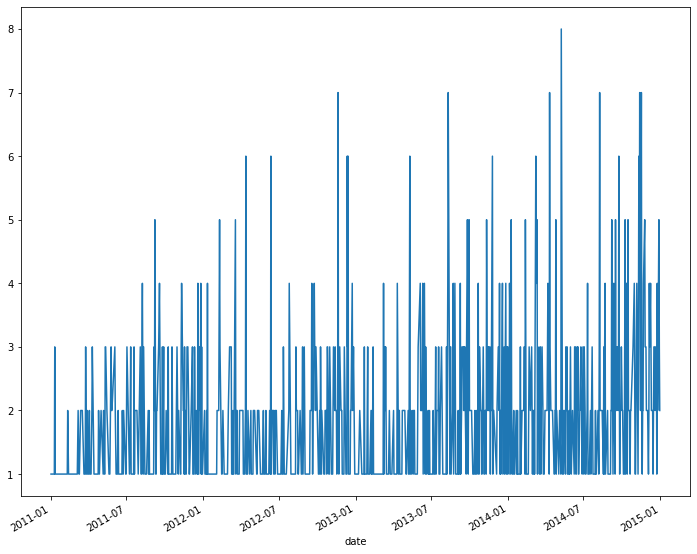

In [ ]:
df_ex1.groupby("date")['Order ID'].nunique().plot(figsize = (12,10))

E os produtos por data?

<AxesSubplot: xlabel='date'>

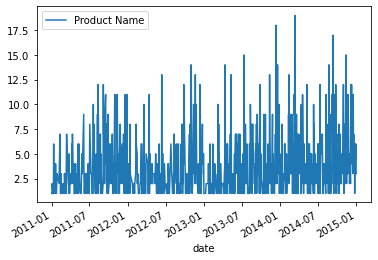

In [ ]:
df_ex1.groupby("date")[['Product Name']].count().plot()

Como faríamos com o matplotlib?

In [ ]:
import matplotlib.pyplot as plt

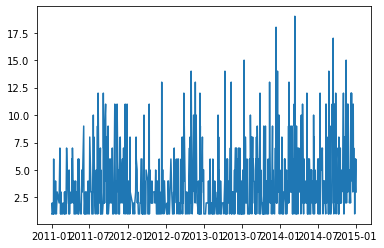

In [ ]:
plt.plot(df_ex1.groupby("date")[['Product Name']].count())

O pacote já "entende" o que estamos tentando fazer se passarmos puramente o dataframe agrupado, mas também podemos querer especificar cada parâmetro separadamente.

In [ ]:
df_grouped = df_ex1.groupby("date")[['Product Name']].count()
df_grouped

,Product Name
date,
2011-01-02,1
2011-01-03,1
2011-01-04,2
2011-01-07,1
2011-01-08,1
...,...
2014-12-25,6
2014-12-26,3
2014-12-29,6


In [ ]:
x = list(df_grouped.index)
y = df_grouped.values

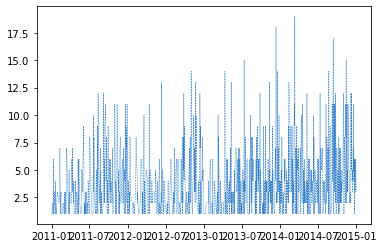

In [ ]:
plt.plot(x,y, c = (0.2,0.5,0.8), linestyle = '--', linewidth = 0.5, markersize = 5)

Quais as principais diferenças no plot com os dois pacotes?

- O matplotlib produz um gráfico "menos processado" (menos personalização por padrão; por ex: não vem com legenda, nomes nos eixos etc)

[Gráfico de barras](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html)

Vamos plotar os estados mais lucrativos no dataset todo?

In [ ]:
df_ex1.head()

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit,date
0,CA-2013-138688,13-06-2013,17-06-2013,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87,2013-06-13
1,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17,2011-09-06
2,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97,2011-09-06
3,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72,2011-09-06
4,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78,2011-09-06


<AxesSubplot: xlabel='State'>

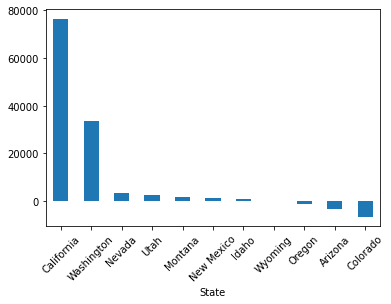

In [ ]:
# Com o pandas
df_ex1.groupby("State")['Profit'].sum().sort_values(ascending = False).plot(kind = 'bar', rot = 45)

E com matplotlib?

In [ ]:
df_grouped = df_ex1.groupby("State")['Profit'].sum().sort_values(ascending = False)

In [ ]:
x = list(df_grouped.index)
y = df_grouped.values

<BarContainer object of 11 artists>

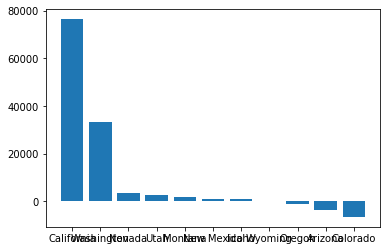

In [ ]:
plt.bar(x,y,width = 0.8)

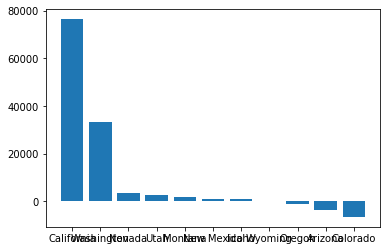

In [ ]:
bars = plt.bar(x,y,width = 0.8)

In [ ]:
bars

<BarContainer object of 11 artists>

Vamos colocar os rótulos nas barras?

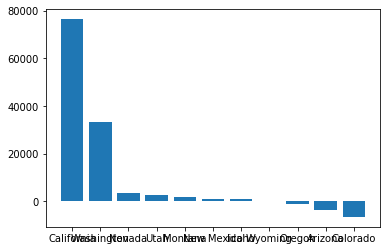

In [ ]:
fig = plt.figure() # declara uma figura

bars = plt.bar(x,y)
ax = fig.get_axes()

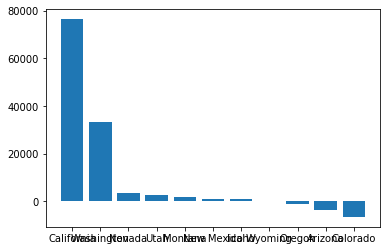

In [ ]:
fig

In [ ]:
ax

[<AxesSubplot: >]

[Axes.bar_label](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar_label.html)

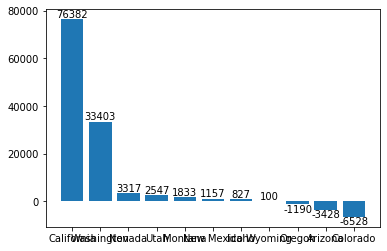

In [ ]:
fig = plt.figure() # declara uma figura

bars = plt.bar(x,y) # plota o gráfico
ax = fig.get_axes() # retorna o elemento "axes"

ax[0].bar_label(bars, fmt = '%.0f');

In [ ]:
bars.datavalues

array([76381.6 , 33402.7 ,  3316.76,  2546.56,  1833.32,  1157.13,
         826.73,   100.2 , -1190.48, -3427.87, -6527.86])

<ipython-input-76-d1280127860c>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(labels = x, rotation = 45);


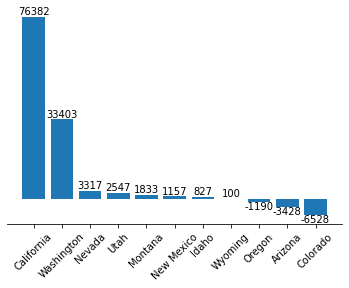

In [ ]:
fig = plt.figure() # declara uma figura

bars = plt.bar(x,y) # plota o gráfico
ax = fig.get_axes() # retorna o elemento "axes"

ax[0].bar_label(bars, fmt = '%.0f')

ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['left'].set_visible(False)

ax[0].get_yaxis().set_visible(False)

ax[0].set_xticklabels(labels = x, rotation = 45)

E se quiséssemos fazer o mesmo tipo de visão, mas uma por ano, na mesma figura?

Vamos, primeiro, pensar com "dados fictícios"

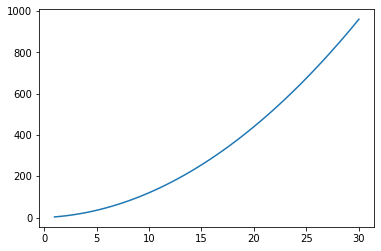

In [ ]:
import numpy as np

# dados fícticios
x = np.linspace(1,30,50)
y = 2*x + x**2

plt.plot(x,y)

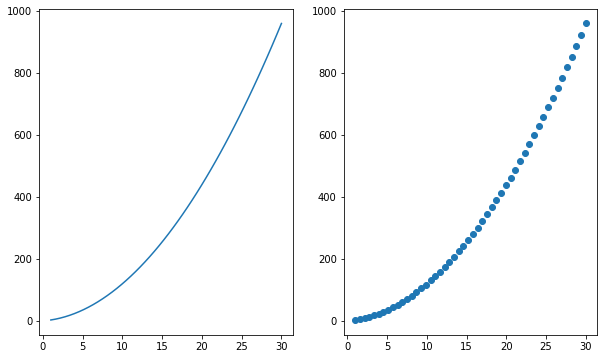

In [ ]:
# Abrindo a figura e objetos dos "axes"
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,6))

# primeiro plot
ax[0].plot(x,y)

# segundo plot
ax[1].scatter(x,y)

In [ ]:
ax

array([[<AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >]], dtype=object)

Uma outra forma...

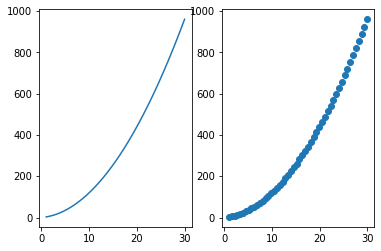

In [ ]:
# Pensando em uma figura 1 x 2 (1 linha e 2 colunas)

# Plotando na primeira posição da figura
plt.subplot(1,2,1)
plt.plot(x,y)

# Plotando na segunda posição da figura
plt.subplot(1,2,2)
plt.scatter(x,y)

(<Figure size 432x288 with 4 Axes>,
 array([[<AxesSubplot: >, <AxesSubplot: >],
        [<AxesSubplot: >, <AxesSubplot: >]], dtype=object))

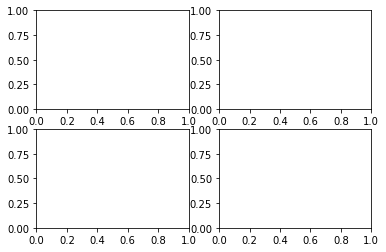

In [ ]:
plt.subplots(2,2)

(<Figure size 432x288 with 2 Axes>,
 array([<AxesSubplot: >, <AxesSubplot: >], dtype=object))

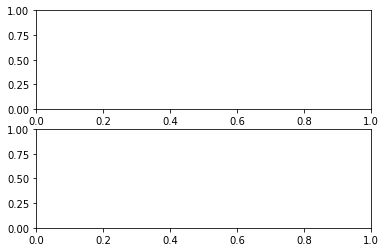

In [ ]:
plt.subplots(2,1)

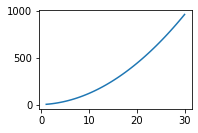

In [ ]:
plt.subplot(2,2,1)
plt.plot(x,y)

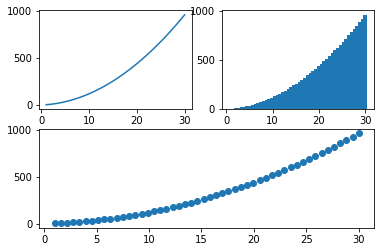

In [ ]:
plt.subplot(2,2,1)
plt.plot(x,y)

plt.subplot(2,2,2)
plt.bar(x,y)

plt.subplot(2,1,2)
plt.scatter(x,y)

Voltando ao nosso conjunto de dados...

In [ ]:
df_ex1.head()

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit,date
0,CA-2013-138688,13-06-2013,17-06-2013,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87,2013-06-13
1,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17,2011-09-06
2,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97,2011-09-06
3,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72,2011-09-06
4,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78,2011-09-06


Vamos fazer um gráfico de barras, como acima, mas por ano.

In [ ]:
df_ex1['date'].min()

Timestamp('2011-01-02 00:00:00')

In [ ]:
df_ex1['date'].max()

Timestamp('2014-12-31 00:00:00')

<ipython-input-128-88a8d6341ba3>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,i].set_xticklabels(labels = x, rotation = 45)
<ipython-input-128-88a8d6341ba3>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,i].set_xticklabels(labels = x, rotation = 45)
<ipython-input-128-88a8d6341ba3>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,i].set_xticklabels(labels = x, rotation = 45)
<ipython-input-128-88a8d6341ba3>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,i].set_xticklabels(labels = x, rotation = 45)


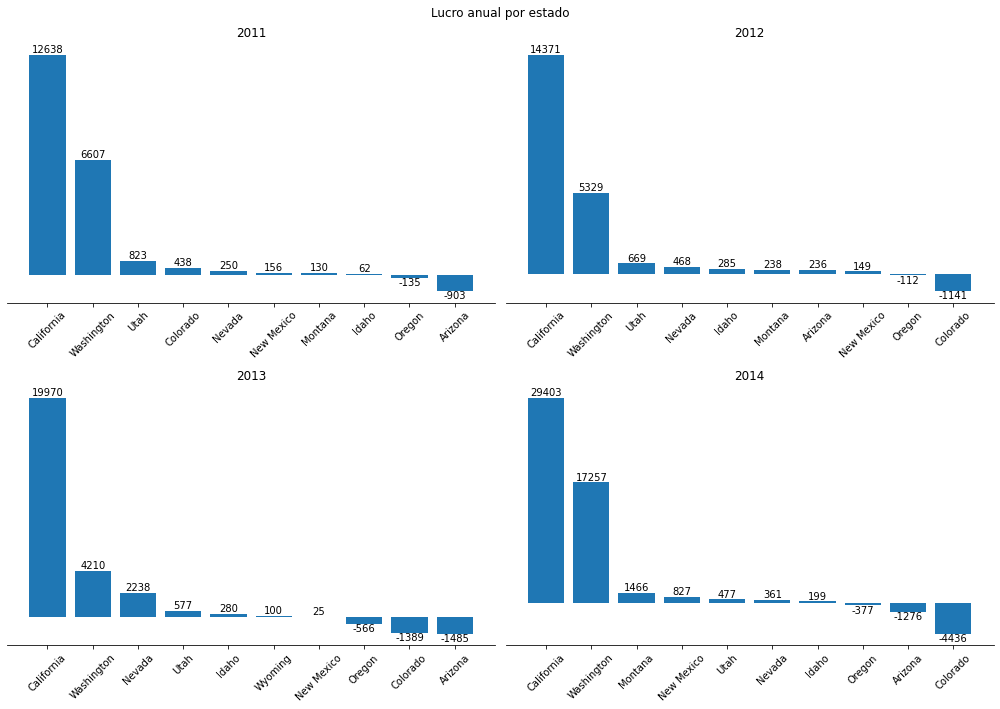

In [ ]:
# Vamos dividir nossa figura em 4 gráficos (um por ano)
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (14,10))
ax = np.reshape(ax, (1,4))

year = ['2011', '2012', '2013', '2014']

subplot_counter = 1
for i in range(0,4):
    plt.subplot(2,2,subplot_counter)
    
    # Para cada ano
    df_year = df_ex1[(df_ex1['date'] >= year[i]+'-01-01') & (df_ex1['date'] <= year[i]+'-12-31')]
    df_grouped = df_year.groupby("State")['Profit'].sum().sort_values(ascending = False)
    
    x = list(df_grouped.index)
    y = df_grouped.values
    
    bars = plt.bar(x,y)
    subplot_counter += 1
    
    plt.title(year[i])
    
    ax[0,i].bar_label(bars, fmt = '%.0f')

    ax[0,i].spines['right'].set_visible(False)
    ax[0,i].spines['top'].set_visible(False)
    ax[0,i].spines['left'].set_visible(False)

    ax[0,i].get_yaxis().set_visible(False)

    ax[0,i].set_xticklabels(labels = x, rotation = 45)

plt.suptitle("Lucro anual por estado")
plt.tight_layout()

## Vamos, agora, "por a mão na massa"!

### Gerando algumas visualizações descritivas com matplotlib

Vamos utilizar um dataset [dos preços dos combustíveis no Brasil](https://www.kaggle.com/datasets/matheusfreitag/gas-prices-in-brazil).

Reproduza as visualizações abaixo. Para cada uma, pense em pontos que você poderia modificar na visualização, pensando em aprimorá-la.

#### Preços médios do etanol e da gasolina, por região do Brasil

In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

dfgas = pd.read_csv('data/gas_price_brazil.tsv', sep = '\t')

dfgas.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082


Text(0.5, 0.98, 'Preço Médio de revenda por região')

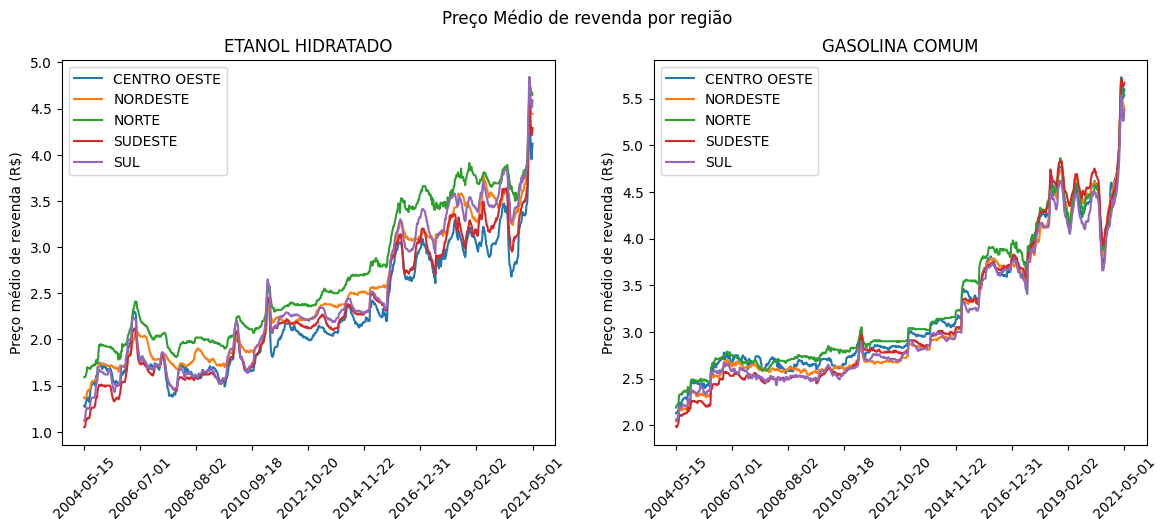

In [2]:
def getXticks(lista, n):
    delta = (len(lista)-1)/(n-1)
    out = [lista[math.ceil(i * delta)] for i in range(n)]
    return out

df_ex1 = dfgas[['DATA FINAL','REGIÃO','PRODUTO','PREÇO MÉDIO REVENDA']].query('PRODUTO in ("ETANOL HIDRATADO","GASOLINA COMUM")')
df_ex1 = df_ex1.groupby(['DATA FINAL','REGIÃO','PRODUTO'])['PREÇO MÉDIO REVENDA'].mean().round(2).reset_index()

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14,5))

produtos = list(df_ex1['PRODUTO'].unique())
regioes = list(df_ex1['REGIÃO'].unique())
datas = list(df_ex1['DATA FINAL'].unique())

xticks = getXticks(datas, 9)

subplot_counter = 1
for i in range(0,2):
    plt.subplot(1,2,subplot_counter)

    df_aux = df_ex1[df_ex1['PRODUTO']==produtos[i]]
    
    for r in regioes:
        x = list(df_aux[df_ex1['REGIÃO']==r]['DATA FINAL'])
        y = df_aux[df_ex1['REGIÃO']==r]['PREÇO MÉDIO REVENDA']

        ax[i].plot(x, y, label = r)
        ax[i].set_xticks(xticks)
        ax[i].set_xticklabels(labels = xticks, rotation = 45)
        ax[i].set_ylabel("Preço médio de revenda (R$)")
        ax[i].legend()

    subplot_counter += 1
    
    plt.title(produtos[i])
    
plt.suptitle("Preço Médio de revenda por região")

#### Preço médio em 2020 dos preços do Etanol e da Gasolina por região

#### V1 - Considerando apenas Gasolina Comum como gasolina para ficar igual ao exemplo

[Text(0.5, 0, '')]

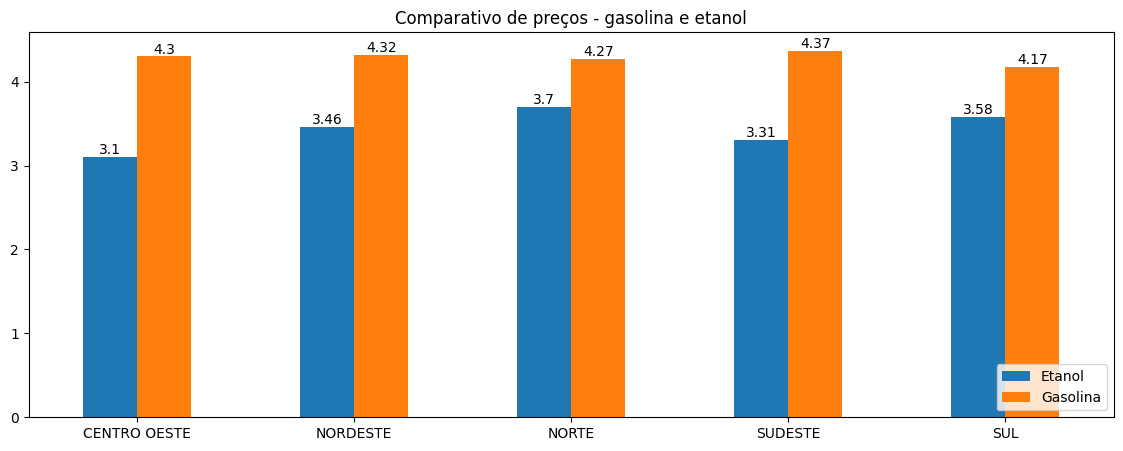

In [72]:
cond1 = (dfgas['DATA INICIAL'] >= '2020-01-01')
cond2 = (dfgas['DATA FINAL'] < '2021-01-01')
cond3 = (dfgas['PRODUTO'].isin(['ETANOL HIDRATADO', 'GASOLINA COMUM', 'GASOLINA ADITIVADA']))

df_ex2_v1 = dfgas.loc[cond1 & cond2 & cond3]
df_ex2_v1['PRODUTO_V1'] = np.select([df_ex2_v1['PRODUTO'] == 'ETANOL HIDRATADO',df_ex2_v1['PRODUTO'] == 'GASOLINA COMUM'], ['Etanol', 'Gasolina'], 'OUTRO')
df_ex2_v1 = df_ex2_v1.query('PRODUTO_V1 != "OUTRO"').groupby(['REGIÃO','PRODUTO_V1'])['PREÇO MÉDIO REVENDA'].mean().round(2).reset_index()

df_ex2_v1 = pd.pivot_table(df_ex2_v1,
                           values = 'PREÇO MÉDIO REVENDA',
                           index = ['REGIÃO'],
                           columns=['PRODUTO_V1'],
                           aggfunc = np.max).reset_index()

ax = df_ex2_v1.plot(x = 'REGIÃO',
          kind = 'bar',
          stacked = False,
          title = 'Comparativo de preços - gasolina e etanol',
          figsize = (14,5),
          rot = 0)

for container in ax.containers:
    ax.bar_label(container)
ax.legend(loc='lower right')
ax.set(xlabel=None)

#### V2 - Considerando os dois tipos de gasolina como gasolina

[Text(0.5, 0, '')]

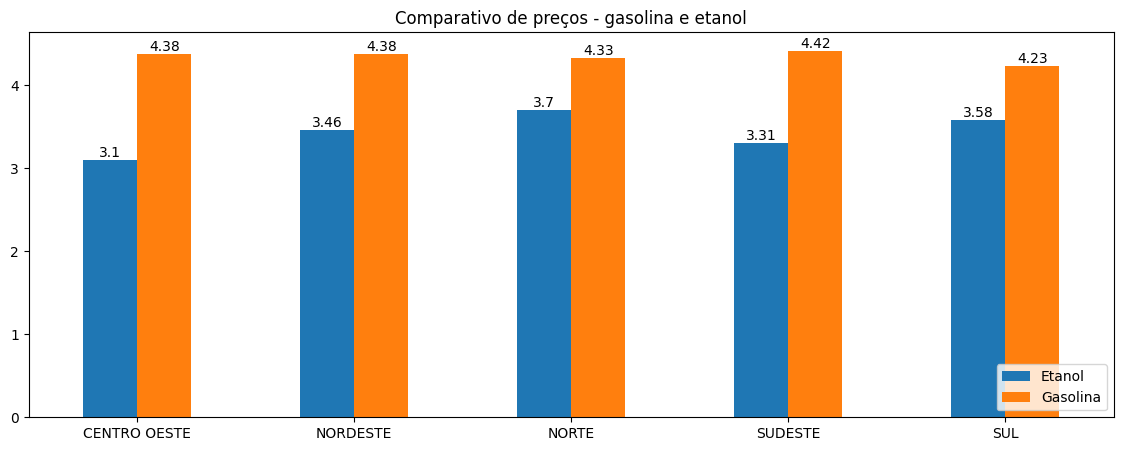

In [73]:
cond1 = (dfgas['DATA INICIAL'] >= '2020-01-01')
cond2 = (dfgas['DATA FINAL'] < '2021-01-01')
cond3 = (dfgas['PRODUTO'].isin(['ETANOL HIDRATADO', 'GASOLINA COMUM', 'GASOLINA ADITIVADA']))

df_ex2_v2 = dfgas.loc[cond1 & cond2 & cond3]
df_ex2_v2['PRODUTO_V1'] = np.select([df_ex2_v2['PRODUTO'] == 'ETANOL HIDRATADO',df_ex2_v2['PRODUTO'].isin(['GASOLINA COMUM','GASOLINA ADITIVADA'])], ['Etanol', 'Gasolina'], 'OUTRO')
df_ex2_v2 = df_ex2_v2.query('PRODUTO_V1 != "OUTRO"').groupby(['REGIÃO','PRODUTO_V1'])['PREÇO MÉDIO REVENDA'].mean().round(2).reset_index()

df_ex2_v2 = pd.pivot_table(df_ex2_v2,
                           values = 'PREÇO MÉDIO REVENDA',
                           index = ['REGIÃO'],
                           columns=['PRODUTO_V1'],
                           aggfunc = np.max).reset_index()

ax = df_ex2_v2.plot(x = 'REGIÃO',
          kind = 'bar',
          stacked = False,
          title = 'Comparativo de preços - gasolina e etanol',
          figsize = (14,5),
          rot = 0)

for container in ax.containers:
    ax.bar_label(container)
ax.legend(loc='lower right')
ax.set(xlabel=None)

#### Total consolidado de postos para cada estado

<Axes: title={'center': 'Total consolidado de postos avalidos por estado'}>

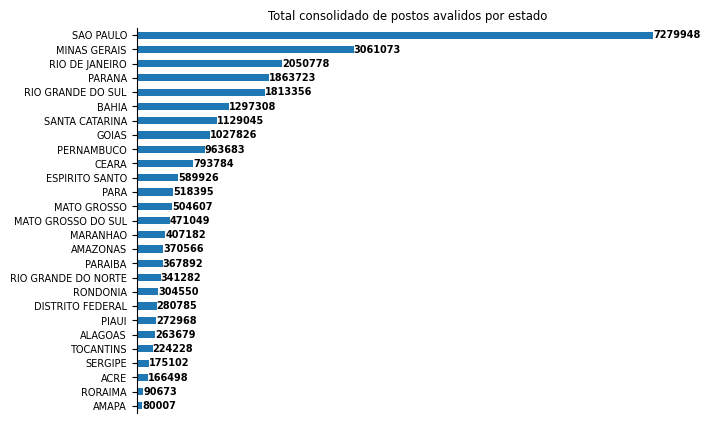

In [60]:
# dfgas.head()
df_ex3 = dfgas.groupby('ESTADO')['NÚMERO DE POSTOS PESQUISADOS'].sum().reset_index().sort_values('NÚMERO DE POSTOS PESQUISADOS')

plt.rcParams.update({'font.size': 7})

ax = df_ex3.plot.barh(
    y = 'NÚMERO DE POSTOS PESQUISADOS',
    x = 'ESTADO',
    title = 'Total consolidado de postos avalidos por estado',
    figsize = (7,5))

for container in ax.containers:
    ax.bar_label(container, fmt = '%d', weight = 'bold')

ax.spines[['right', 'top', 'bottom']].set_visible(False)
ax.set_xticks([])
ax.set(ylabel=None)
ax.get_legend().remove()


ax

#### Relação entre preço da gasolina e do etanol (nível Brasil)

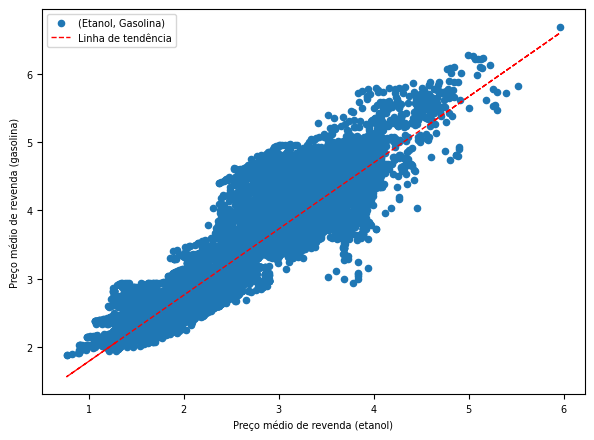

In [42]:
from sklearn.linear_model import LinearRegression

cond1 = (dfgas['PRODUTO'].isin(['ETANOL HIDRATADO', 'GASOLINA COMUM']))
df_ex4 = dfgas.loc[cond1]
df_ex4['PRODUTO_V1'] = np.select([df_ex4['PRODUTO'] == 'ETANOL HIDRATADO',df_ex4['PRODUTO'].isin(['GASOLINA COMUM'])], ['Etanol', 'Gasolina'], 'OUTRO')


df_ex4 = df_ex4[['DATA INICIAL', 'DATA FINAL', 'REGIÃO', 'ESTADO', 'PRODUTO_V1','PREÇO MÉDIO REVENDA']]

# df_ex4['ID'] = df_ex4.index

df_ex4 = pd.pivot(df_ex4,
                        values = ['PREÇO MÉDIO REVENDA'],
                        columns=['PRODUTO_V1'],
                        index = ['DATA INICIAL', 'DATA FINAL', 'REGIÃO', 'ESTADO']
)
df_ex4.columns = [tup[1] for tup in df_ex4.columns.to_flat_index()]
df_ex4 = df_ex4.reset_index(drop=True).fillna(0)
df_ex4 = df_ex4.loc[(df_ex4['Etanol'] > 0) & (df_ex4['Gasolina'] > 0) ]

#linha regressão
linreg = LinearRegression().fit(np.array(df_ex4['Etanol']).reshape((-1, 1)), np.array(df_ex4['Gasolina']))
y_pred = linreg.predict(np.array(df_ex4['Etanol']).reshape((-1, 1)))
df_ex4['y_pred'] = y_pred

plt.rcParams.update({'font.size': 7})

ax = df_ex4.plot.scatter(x = 'Etanol', y = 'Gasolina', label = '(Etanol, Gasolina)', figsize = (7, 5))
ax.set_ylabel('Preço médio de revenda (gasolina)')
ax.set_xlabel('Preço médio de revenda (etanol)')

plt.plot(np.array(df_ex4['Etanol']), y_pred, label = 'Linha de tendência', c = 'r', linestyle='dashed', linewidth = 1)

plt.legend(loc="upper left")